In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df = pd.read_excel('GNO_FOR_FORECAST.xlsx', 'Sheet1', usecols=['Date', 'FOB_Net_Weight'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            153 non-null    datetime64[ns]
 1   FOB_Net_Weight  153 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [4]:
df['Price_LastMonth']=df['FOB_Net_Weight'].shift(+1)
df['Price_2Monthsback']=df['FOB_Net_Weight'].shift(+2)
df['Price_3Monthsback']=df['FOB_Net_Weight'].shift(+3)
df

,Date,FOB_Net_Weight,Price_LastMonth,Price_2Monthsback,Price_3Monthsback
0,2018-07-14 08:00:00,175.000000,NaN,NaN,NaN
1,2018-07-17 08:00:00,75.808333,175.000000,NaN,NaN
2,2018-07-27 08:00:00,126.500000,75.808333,175.000000,NaN
3,2018-08-08 08:00:00,160.066667,126.500000,75.808333,175.000000
4,2018-08-10 08:00:00,110.180000,160.066667,126.500000,75.808333
...,...,...,...,...,...
148,2021-07-08 08:00:00,238.380000,218.000000,205.000000,227.857040
149,2021-07-15 08:00:00,237.077855,238.380000,218.000000,205.000000
150,2021-08-02 08:00:00,192.500000,237.077855,238.380000,218.000000
151,2021-08-06 08:00:00,205.000000,192.500000,237.077855,238.380000


In [5]:
df=df.dropna()
df

,Date,FOB_Net_Weight,Price_LastMonth,Price_2Monthsback,Price_3Monthsback
3,2018-08-08 08:00:00,160.066667,126.500000,75.808333,175.000000
4,2018-08-10 08:00:00,110.180000,160.066667,126.500000,75.808333
5,2018-08-14 08:00:00,81.891892,110.180000,160.066667,126.500000
6,2018-08-21 08:00:00,94.487578,81.891892,110.180000,160.066667
7,2018-08-21 08:00:00,125.000000,94.487578,81.891892,110.180000
...,...,...,...,...,...
148,2021-07-08 08:00:00,238.380000,218.000000,205.000000,227.857040
149,2021-07-15 08:00:00,237.077855,238.380000,218.000000,205.000000
150,2021-08-02 08:00:00,192.500000,237.077855,238.380000,218.000000
151,2021-08-06 08:00:00,205.000000,192.500000,237.077855,238.380000


In [6]:
df.describe()

,FOB_Net_Weight,Price_LastMonth,Price_2Monthsback,Price_3Monthsback
count,150.000000,150.000000,150.000000,150.000000
mean,224.475096,223.865096,223.003818,222.887151
std,101.890220,102.202664,102.904659,102.949384
min,67.500000,67.500000,67.500000,67.500000
25%,155.250000,155.000000,155.000000,155.000000
50%,206.000000,205.000000,205.000000,205.000000
75%,257.541675,257.541675,257.541675,257.541675
max,614.000000,614.000000,614.000000,614.000000


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [9]:
import numpy as np
x1,x2,x3,y=df['Price_LastMonth'],df['Price_2Monthsback'],df['Price_3Monthsback'],df['FOB_Net_Weight']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[126.5         75.80833333 175.        ]
 [160.06666667 126.5         75.80833333]
 [110.18       160.06666667 126.5       ]
 [ 81.89189189 110.18       160.06666667]
 [ 94.48757799  81.89189189 110.18      ]
 [125.          94.48757799  81.89189189]
 [139.72694698 125.          94.48757799]
 [180.         139.72694698 125.        ]
 [225.         180.         139.72694698]
 [207.         225.         180.        ]
 [124.         207.         225.        ]
 [ 76.42222222 124.         207.        ]
 [219.6         76.42222222 124.        ]
 [106.04545455 219.6         76.42222222]
 [197.         106.04545455 219.6       ]
 [235.         197.         106.04545455]
 [131.         235.         197.        ]
 [111.38235294 131.         235.        ]
 [294.6        111.38235294 131.        ]
 [ 67.5        294.6        111.38235294]
 [131.          67.5        294.6       ]
 [266.075      131.          67.5       ]
 [ 85.94017094 266.075      131.        ]
 [243.51        85.94017094 266.07

In [10]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [11]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

E:\Users\BAGJA\AppData\Local\Temp\ipykernel_1720\1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

In [12]:
model.score(X_train, y_train)
lin_model.score(X_train, y_train)

0.07231425201172215

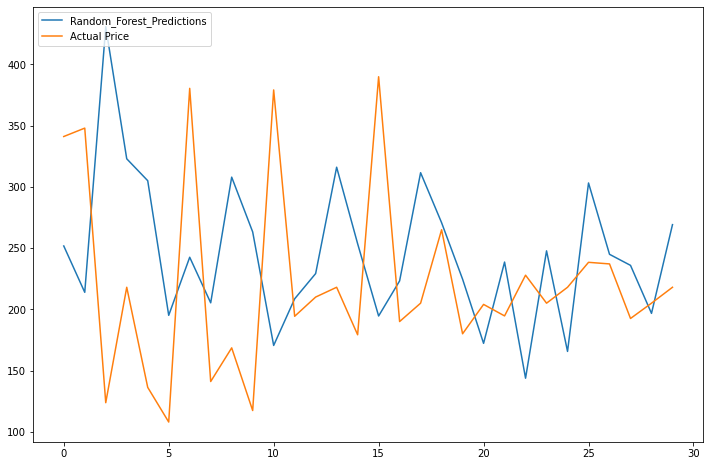

[251.736001   213.87452524 430.88659    322.95508267 305.069736
 195.07689746 242.52906456 205.29156008 307.96314054 263.21397
 170.4678215  208.56630104 229.19930155 316.081034   253.56992006
 194.5350585  223.2015     311.607697   270.750867   224.63250513
 172.18983218 238.5898     143.70106222 247.750701   165.59106782
 303.20720567 244.92256053 235.891732   196.67697775 269.16953422]


245.2966348910676

In [13]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Price') 
plt.legend(loc="upper left")
plt.show()
print(pred)
pred.mean()

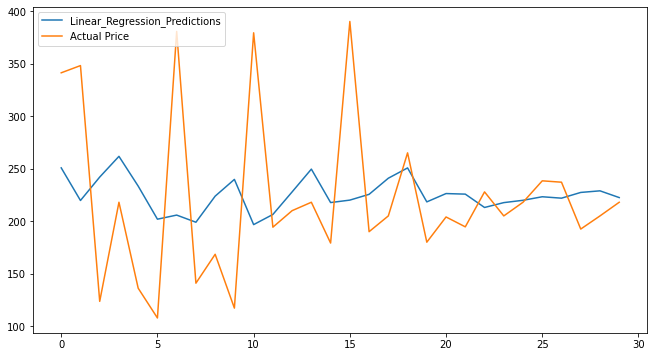

[[250.71155693]
 [219.67579868]
 [241.95995175]
 [261.67973407]
 [233.3649785 ]
 [201.88805664]
 [205.78842219]
 [198.98562927]
 [223.80403344]
 [239.74149272]
 [196.72705639]
 [206.38448195]
 [227.86255332]
 [249.52892706]
 [217.7106261 ]
 [220.03949876]
 [225.53492512]
 [240.87047476]
 [250.65906593]
 [218.35229293]
 [226.27042402]
 [225.72364595]
 [213.02965664]
 [217.65101207]
 [219.86524117]
 [223.22670028]
 [221.88017942]
 [227.34054821]
 [228.86327501]
 [222.44547111]]


225.25219034622572

In [14]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Price')
plt.legend(loc="upper left")
plt.show()
print(lin_pred)
lin_pred.mean()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [16]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 110.58030244644611
Mean Squared Error for Linear Regression Model is: 78.36506993212103


In [17]:
# Nilai Prediksi - Mean Squared Error = Prediksi paling tepat
225.25219034622572-78.36506993212103

146.8871204141047